In [3]:
from sqlalchemy import create_engine
from rent_scrapper import Arkadia_scrapper,push_newest_data
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
push_newest_data()

In [5]:
config = { 'user': "root",
            'password': "rootroot",
            'host': "localhost",
            'database': "apartments",
            'port': '3306'}

In [6]:
def create_url(user, password, host, database, port):
    return f"mysql://{user}:{password}@{host}:{port}/{database}"

pool = create_engine(url=create_url(**config),
                     pool_size=20, max_overflow=0
                     )
with pool.connect() as conn:
    df = pd.read_sql('SELECT * FROM prices', conn)

In [7]:
df = df.merge(df.groupby(['Sq.Ft','date_update']).price_floor.mean().reset_index().rename({'price_floor':'price_mean_horizontal'},axis=1),
         on = ['Sq.Ft','date_update'])
df = df.merge( df.groupby('room_number').price_floor.mean().reset_index().rename({'price_floor':'price_mean_vertical'},axis=1),
               on = 'room_number')

In [8]:
df['deviation_from_cohort'] = df.eval('price_floor - price_mean_horizontal')
df['deviation_from_history'] = df.eval('price_floor - price_mean_vertical')

In [9]:
# Analyze best deals
df.dropna(subset='price_floor').query('price_floor < price_mean_horizontal').sort_values(['room_number','date_update','price_mean_horizontal'])

,index,room_number,Sq.Ft,Avaliable_date,date_update,price_floor,price_ceil,Floor_Plan,num_bedroom,num_bathroom,apartment,price_mean_horizontal,price_mean_vertical,deviation_from_cohort,deviation_from_history
104,26,#0701,1168,None,2022-11-02,3740.0,4380.0,1 Bed/1 Bath-02,1,1,Arkadia,3833.500000,3739.25,-93.500000,0.75
105,30,#0701,1168,None,2022-11-03 12:52:26,3739.0,4379.0,2 Bed/2 Bath-01,2,2,Arkadia,3832.500000,3739.25,-93.500000,-0.25
106,30,#0701,1168,None,2022-11-03 13:00:27,3739.0,4379.0,2 Bed/2 Bath-01,2,2,Arkadia,3832.500000,3739.25,-93.500000,-0.25
107,30,#0701,1168,None,2022-11-03 13:40:33,3739.0,4379.0,2 Bed/2 Bath-01,2,2,Arkadia,3832.500000,3739.25,-93.500000,-0.25
52,13,#0911,707,None,2022-11-02,2517.0,2852.0,1 Bed/1 Bath-02,1,1,Arkadia,2593.142857,2524.50,-76.142857,-7.50
53,11,#0911,707,None,2022-11-03 12:52:26,2527.0,2864.0,1 Bed/1 Bath-11,1,1,Arkadia,2603.142857,2524.50,-76.142857,2.50
54,11,#0911,707,None,2022-11-03 13:00:27,2527.0,2864.0,1 Bed/1 Bath-11,1,1,Arkadia,2603.142857,2524.50,-76.142857,2.50
55,11,#0911,707,None,2022-11-03 13:40:33,2527.0,2864.0,1 Bed/1 Bath-11,1,1,Arkadia,2603.142857,2524.50,-76.142857,2.50
60,15,#1311,707,12/7/2022,2022-11-02,2445.0,2845.0,1 Bed/1 Bath-02,1,1,Arkadia,2593.142857,2452.50,-148.142857,-7.50
61,13,#1311,707,12/7/2022,2022-11-03 12:52:26,2455.0,2856.0,1 Bed/1 Bath-11,1,1,Arkadia,2603.142857,2452.50,-148.142857,2.50


In [10]:
# Analyze best deals
df.dropna(subset='price_floor').query('price_floor < price_mean_vertical').sort_values(['room_number','date_update','deviation_from_history'])

,index,room_number,Sq.Ft,Avaliable_date,date_update,price_floor,price_ceil,Floor_Plan,num_bedroom,num_bathroom,apartment,price_mean_horizontal,price_mean_vertical,deviation_from_cohort,deviation_from_history
105,30,#0701,1168,None,2022-11-03 12:52:26,3739.0,4379.0,2 Bed/2 Bath-01,2,2,Arkadia,3832.500000,3739.25,-93.500000,-0.25
106,30,#0701,1168,None,2022-11-03 13:00:27,3739.0,4379.0,2 Bed/2 Bath-01,2,2,Arkadia,3832.500000,3739.25,-93.500000,-0.25
107,30,#0701,1168,None,2022-11-03 13:40:33,3739.0,4379.0,2 Bed/2 Bath-01,2,2,Arkadia,3832.500000,3739.25,-93.500000,-0.25
52,13,#0911,707,None,2022-11-02,2517.0,2852.0,1 Bed/1 Bath-02,1,1,Arkadia,2593.142857,2524.50,-76.142857,-7.50
60,15,#1311,707,12/7/2022,2022-11-02,2445.0,2845.0,1 Bed/1 Bath-02,1,1,Arkadia,2593.142857,2452.50,-148.142857,-7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,7,#3202,700,None,2022-11-02,2692.0,3041.0,1 Bed/1 Bath-02,1,1,Arkadia,2677.000000,2699.50,15.000000,-7.50
56,14,#3211,707,12/6/2022,2022-11-02,2635.0,3054.0,1 Bed/1 Bath-02,1,1,Arkadia,2593.142857,2642.50,41.857143,-7.50
81,22,#3212,799,1/7/2023,2022-11-03 12:52:26,2618.0,3100.0,1 Bed/1 Bath-12,1,1,Arkadia,2532.200000,2674.75,85.800000,-56.75
82,22,#3212,799,1/7/2023,2022-11-03 13:00:27,2618.0,3100.0,1 Bed/1 Bath-12,1,1,Arkadia,2532.200000,2674.75,85.800000,-56.75


<AxesSubplot:>

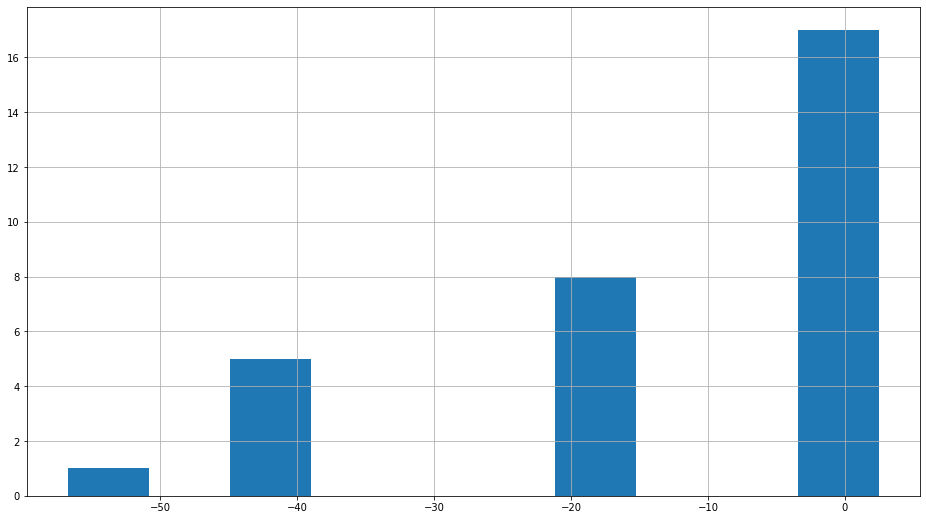

In [11]:
# Understand trend
df.query('date_update == "{}"'.format(df.date_update.max())).deviation_from_history.hist(figsize=(16,9))

C:\Users\18066\AppData\Local\Temp/ipykernel_41568/2036508357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.date_update = pd.DatetimeIndex(df_plot.date_update )


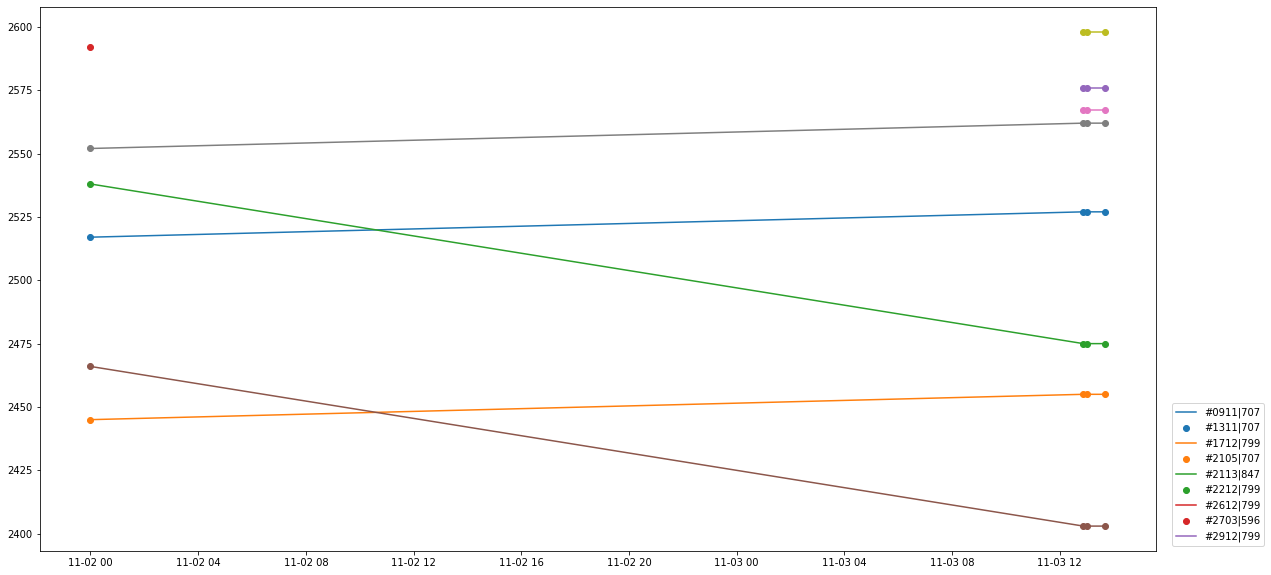

In [12]:
df_plot = df.query('num_bedroom == "1" and num_bathroom == "1" and price_floor < 2600')
###
df_plot.date_update = pd.DatetimeIndex(df_plot.date_update )
legends = []
plt.figure(figsize=(20,10))
for group,df_group in df_plot.groupby('room_number'):
    legends.append(group+'|'+str(df_group['Sq.Ft'].to_list()[-1]))
    df_group = df_group.set_index('date_update')
    plt.plot(df_group.index, df_group.price_floor)
    plt.scatter(df_group.index, df_group.price_floor)
plt.legend(legends,loc='lower left', bbox_to_anchor=(1.01, 0., 0.5, 0.5))